In [7]:
import os
os.chdir("..")  # 回到项目根目录

In [1]:
import pandas as pd
import os

# 设置 outputs 文件夹路径
output_dir = "../outputs"  # 根据你的 .ipynb 文件位置可能需要调整为 "./outputs"

# 过滤所有包含“耦合模型”关键词的 xlsx 文件
coupling_files = [f for f in os.listdir(output_dir) if f.endswith('.xlsx') and '耦合模型' in f]

# 创建一个字典存储所有读取的结果
dfs = {}

# 遍历读取每个耦合模型结果文件，并输出索引（index）
for file in coupling_files:
    file_path = os.path.join(output_dir, file)
    df = pd.read_excel(file_path, index_col=0)
    dfs[file] = df
    print(f"\n📘 文件名: {file}")
    print("索引（index）:", df.index.tolist())
    print("列（columns）:", df.columns.tolist())



📘 文件名: 03_目标层得分_区域总得分_耦合模型.xlsx
索引（index）: ['Airport New City', 'Fengdong New City', 'Fengxi New City', 'Jinghe New City', 'Qinhan New City', 'Xixian New Area']
列（columns）: ['Economic', 'Social', 'Ecological', 'T_Total', 'C', 'T_norm', 'D']

📘 文件名: 04_规划目标层得分_区域总得分_耦合模型_生态_区域x规划权重.xlsx
索引（index）: ['Airport New City', 'Fengdong New City', 'Fengxi New City', 'Jinghe New City', 'Qinhan New City', 'Xixian New Area']
列（columns）: ['Economic', 'Social', 'Ecological', 'T_Total', 'C', 'T_norm', 'D']

📘 文件名: 04_需求目标层得分_区域总得分_耦合模型_生态情景_区域x情景权重.xlsx
索引（index）: ['Airport New City', 'Fengdong New City', 'Fengxi New City', 'Jinghe New City', 'Qinhan New City', 'Xixian New Area']
列（columns）: ['Economic', 'Social', 'Ecological', 'T_Total', 'C', 'T_norm', 'D']

📘 文件名: 05_规划目标层得分_区域总得分_耦合模型_社会_区域x规划权重.xlsx
索引（index）: ['Airport New City', 'Fengdong New City', 'Fengxi New City', 'Jinghe New City', 'Qinhan New City', 'Xixian New Area']
列（columns）: ['Economic', 'Social', 'Ecological', 'T_Total', 'C', 'T_nor

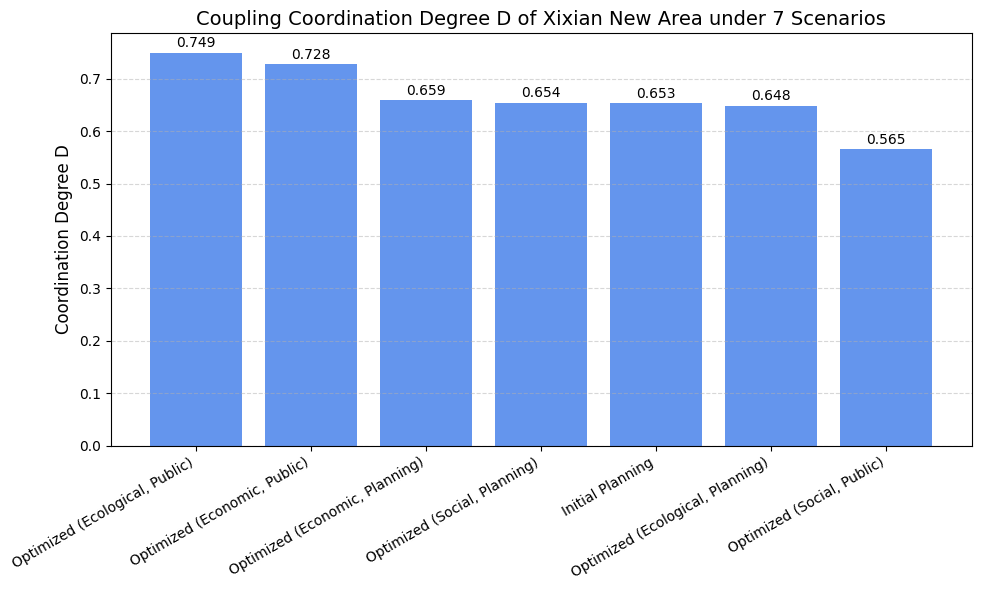

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 文件名与英文情景名称映射
files_info = {
    "03_目标层得分_区域总得分_耦合模型.xlsx": "Initial Planning",
    "04_规划目标层得分_区域总得分_耦合模型_生态_区域x规划权重.xlsx": "Optimized (Ecological, Planning)",
    "04_需求目标层得分_区域总得分_耦合模型_生态情景_区域x情景权重.xlsx": "Optimized (Ecological, Public)",
    "05_规划目标层得分_区域总得分_耦合模型_社会_区域x规划权重.xlsx": "Optimized (Social, Planning)",
    "05_需求目标层得分_区域总得分_耦合模型_社会情景_区域x情景权重.xlsx": "Optimized (Social, Public)",
    "06_规划目标层得分_区域总得分_耦合模型_经济_区域x规划权重.xlsx": "Optimized (Economic, Planning)",
    "06_需求目标层得分_区域总得分_耦合模型_经济情景_区域x情景权重.xlsx": "Optimized (Economic, Public)"
}

# 提取每个文件中 "Xixian New Area" 的 D 值
d_values = {}
for filename, label in files_info.items():
    df = pd.read_excel(f"../outputs/{filename}", index_col=0)
    d_values[label] = df.loc["Xixian New Area", "D"]

# 转为 Series 并排序
d_series = pd.Series(d_values).sort_values(ascending=False)

# 绘图
plt.figure(figsize=(10, 6))
bars = plt.bar(d_series.index, d_series.values, color='cornflowerblue')

# 添加数值标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f"{height:.3f}",
             ha='center', va='bottom', fontsize=10)

# 图形美化
plt.title("Coupling Coordination Degree D of Xixian New Area under 7 Scenarios", fontsize=14)
plt.ylabel("Coordination Degree D", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()



In [21]:
import geopandas as gpd

# 原始 JSON 文件路径（实际上已经是 GeoJSON 格式）
input_path = "data/西咸新区包含5个城.json"

# 加载为 GeoDataFrame
gdf = gpd.read_file(input_path)

# 保存为 .geojson 文件（转换格式并可重命名）
output_path = "outputs/xixian_5zones.geojson"
gdf.to_file(output_path, driver='GeoJSON')

print("✅ 转换完成，已保存为：", output_path)

✅ 转换完成，已保存为： outputs/xixian_5zones.geojson


✅ 文件成功读取！

📌 数据预览：
    stroke  stroke-width  stroke-opacity     fill  fill-opacity  adcode  name  \
0     None           NaN             NaN     None           NaN  610199  西咸新区   
1  #555555           2.0             1.0  #555555           0.5  610199  沣东新城   
2  #555555           0.5             1.0  #555555           0.8  610199  沣西新城   
3  #555555           6.0             1.0  #555555           0.5  610199  空港新城   
4     None           NaN             NaN     None           NaN  610199  泾河新城   

   childrenNum level  subFeatureIndex  \
0          1.0  area             10.0   
1          NaN  None              NaN   
2          NaN  None              NaN   
3          NaN  None              NaN   
4          NaN  None              NaN   

                                            geometry  
0  MULTIPOLYGON (((108.50809 34.37683, 108.50867 ...  
1  POLYGON ((108.82061 34.37263, 108.80413 34.366...  
2  POLYGON ((108.78731 34.35959, 108.78456 34.359...  
3  POLYGON ((108.72379 34.4

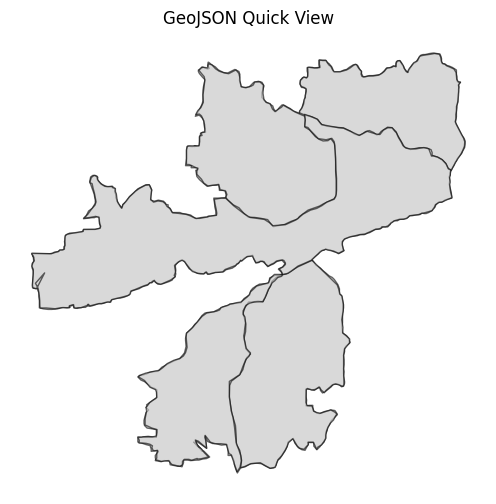

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. 读取 GeoJSON 文件
geojson_path = "outputs/xixian_5zones.geojson"
try:
    gdf = gpd.read_file(geojson_path)
    print("✅ 文件成功读取！")

    # 2. 显示前几行数据
    print("\n📌 数据预览：")
    print(gdf.head())

    # 3. 显示列名
    print("\n📌 列名：")
    print(gdf.columns.tolist())

    # 4. 显示 CRS 信息
    print("\n📌 当前坐标参考系统（CRS）：", gdf.crs)

    # 5. 检查是否有空几何
    empty_geometry = gdf[gdf.geometry.is_empty]
    print(f"\n📌 空几何数量：{len(empty_geometry)}")

    # 6. 检查是否包含 'name' 字段
    if "name" not in gdf.columns:
        print("⚠️ 错误：GeoJSON中未包含 'name' 字段，无法用于合并得分数据。")
    else:
        print("✅ 'name' 字段存在，内容示例：", gdf['name'].unique())

    # 7. 简要绘图查看是否正常渲染
    gdf = gdf[gdf.geometry.notnull()]
    fig, ax = plt.subplots(figsize=(8, 6))
    gdf.plot(ax=ax, edgecolor='black', facecolor='lightgrey', alpha=0.6)
    plt.title("GeoJSON Quick View")
    plt.axis('off')
    plt.show()

except Exception as e:
    print(f"❌ 加载失败：{e}")

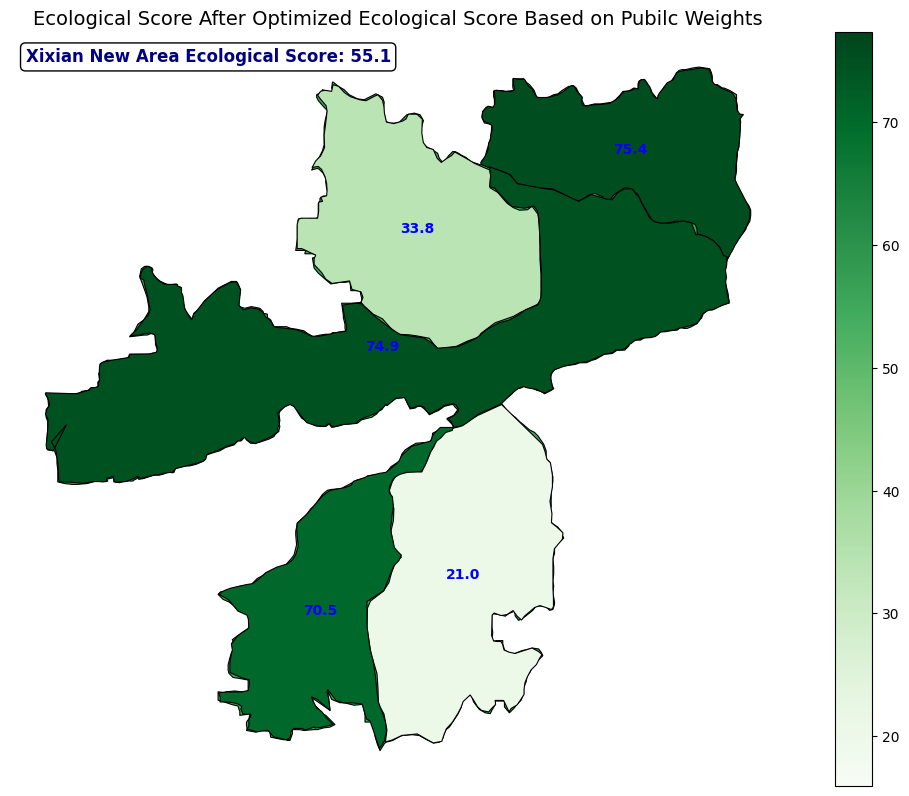

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
gdf = gpd.read_file("outputs/xixian_5zones.geojson")
score_df = pd.read_excel("outputs/04_需求目标层得分_区域总得分_耦合模型_生态情景_区域x情景权重.xlsx", index_col=0)

# 映射中文到英文
name_mapping = {
    "沣东新城": "Fengdong New City",
    "沣西新城": "Fengxi New City",
    "空港新城": "Airport New City",
    "泾河新城": "Jinghe New City",
    "秦汉新城": "Qinhan New City",
    "西咸新区": "Xixian New Area"
}
gdf['name'] = gdf['name'].map(name_mapping)

# 合并得分
gdf = gdf.merge(score_df[['Ecological']], left_on='name', right_index=True, how='left')
gdf = gdf.dropna(subset=['Ecological'])

# 设置色阶范围
vmin = max(0, gdf['Ecological'].min() - 5)
vmax = gdf['Ecological'].max() + 2

# 计算总得分（平均值）
total_score = gdf.loc[gdf['name'] != "Xixian New Area", 'Ecological'].mean()

# 绘图
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Ecological', cmap='Greens', linewidth=0.8, edgecolor='black',
         legend=True, ax=ax, vmin=vmin, vmax=vmax)

# ✅ 添加每个区域的得分标签（排除总区域 Xixian New Area）
for idx, row in gdf.iterrows():
    if row['geometry'].centroid.is_empty or row['name'] == "Xixian New Area":
        continue
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, f"{row['Ecological']:.1f}", fontsize=10, color='blue',
            ha='center', va='center', fontweight='bold')

# ✅ 左上角添加总区域说明（英文）
ax.text(0.02, 0.98, f"Xixian New Area Ecological Score: {total_score:.1f}",
        fontsize=12, color='navy', fontweight='bold', transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# ✅ 英文标题
ax.set_title("Ecological Score After Optimized Ecological Score Based on Pubilc Weights", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


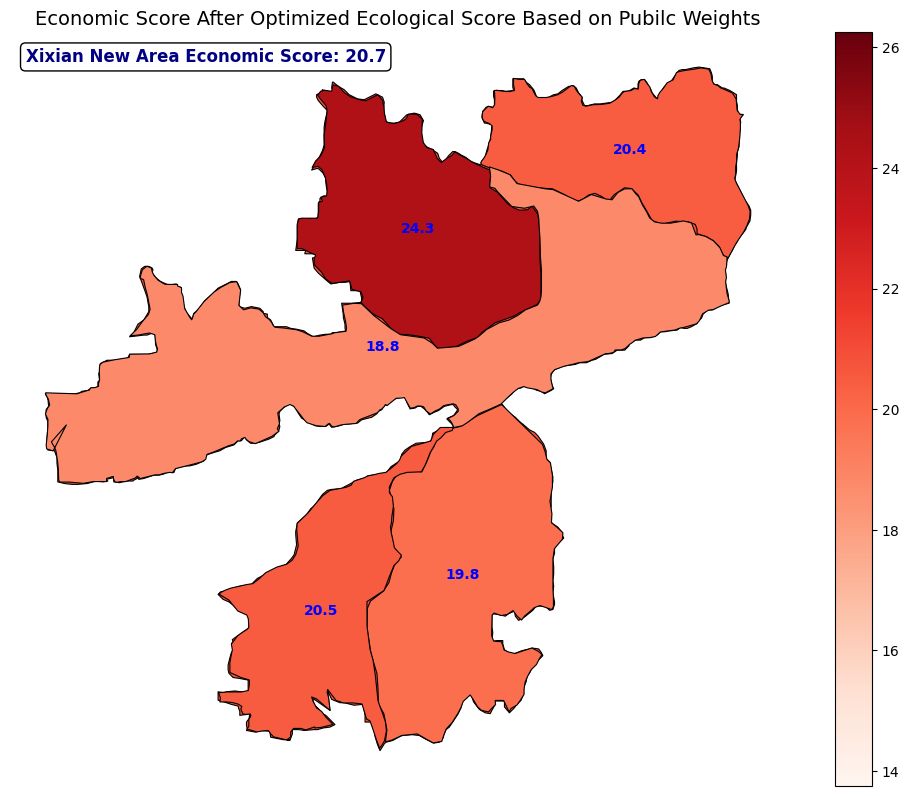

In [34]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
gdf = gpd.read_file("outputs/xixian_5zones.geojson")
score_df = pd.read_excel("outputs/04_需求目标层得分_区域总得分_耦合模型_生态情景_区域x情景权重.xlsx", index_col=0)

# 映射中文到英文
name_mapping = {
    "沣东新城": "Fengdong New City",
    "沣西新城": "Fengxi New City",
    "空港新城": "Airport New City",
    "泾河新城": "Jinghe New City",
    "秦汉新城": "Qinhan New City",
    "西咸新区": "Xixian New Area"
}
gdf['name'] = gdf['name'].map(name_mapping)

# 合并得分
gdf = gdf.merge(score_df[['Economic']], left_on='name', right_index=True, how='left')
gdf = gdf.dropna(subset=['Economic'])

# 设置色阶范围
vmin = max(0, gdf['Economic'].min() - 5)
vmax = gdf['Economic'].max() + 2

# 计算总得分（平均值）
total_score = gdf.loc[gdf['name'] != "Xixian New Area", 'Economic'].mean()

# 绘图
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Economic', cmap='Reds', linewidth=0.8, edgecolor='black',
         legend=True, ax=ax, vmin=vmin, vmax=vmax)

# 添加每个区域的得分标签（排除总区域 Xixian New Area）
for idx, row in gdf.iterrows():
    if row['geometry'].centroid.is_empty or row['name'] == "Xixian New Area":
        continue
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, f"{row['Economic']:.1f}", fontsize=10, color='blue',
            ha='center', va='center', fontweight='bold')

# 左上角添加总区域说明（英文）
ax.text(0.02, 0.98, f"Xixian New Area Economic Score: {total_score:.1f}",
        fontsize=12, color='navy', fontweight='bold', transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# 英文标题
ax.set_title("Economic Score After Optimized Ecological Score Based on Pubilc Weights", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()


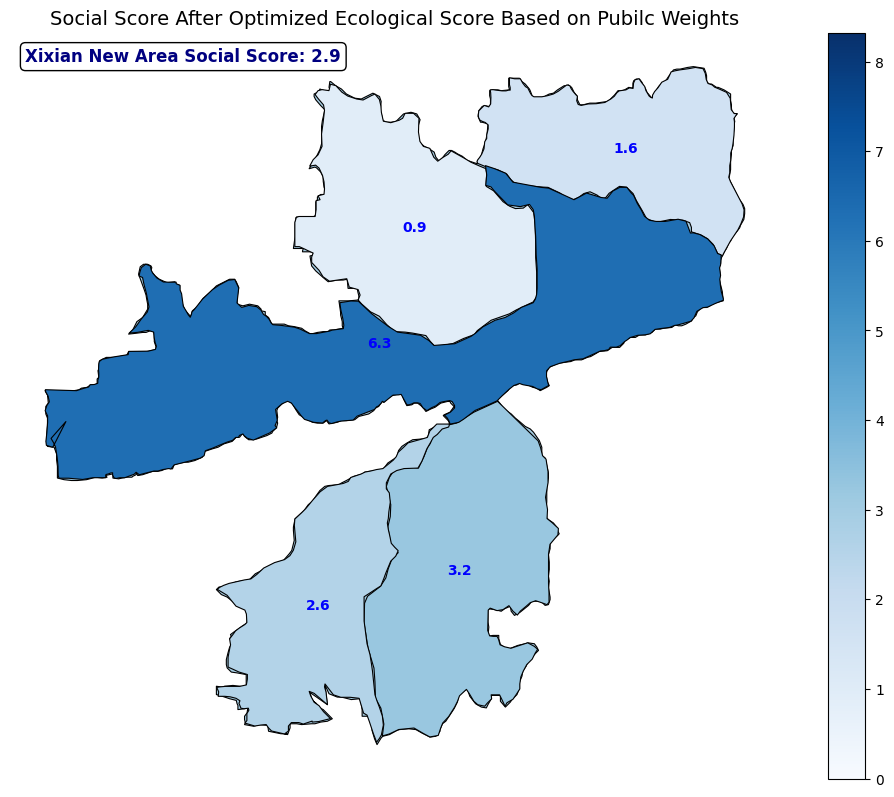

In [36]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
gdf = gpd.read_file("outputs/xixian_5zones.geojson")
score_df = pd.read_excel("outputs/04_需求目标层得分_区域总得分_耦合模型_生态情景_区域x情景权重.xlsx", index_col=0)

# 映射中文到英文
name_mapping = {
    "沣东新城": "Fengdong New City",
    "沣西新城": "Fengxi New City",
    "空港新城": "Airport New City",
    "泾河新城": "Jinghe New City",
    "秦汉新城": "Qinhan New City",
    "西咸新区": "Xixian New Area"
}
gdf['name'] = gdf['name'].map(name_mapping)

# 合并得分
gdf = gdf.merge(score_df[['Social']], left_on='name', right_index=True, how='left')
gdf = gdf.dropna(subset=['Social'])

# 设置色阶范围
vmin = max(0, gdf['Social'].min() - 5)
vmax = gdf['Social'].max() + 2

# 计算总得分（平均值）
total_score = gdf.loc[gdf['name'] != "Xixian New Area", 'Social'].mean()

# 绘图
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(column='Social', cmap='Blues', linewidth=0.8, edgecolor='black',
         legend=True, ax=ax, vmin=vmin, vmax=vmax)

# 添加每个区域的得分标签（排除总区域 Xixian New Area）
for idx, row in gdf.iterrows():
    if row['geometry'].centroid.is_empty or row['name'] == "Xixian New Area":
        continue
    x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, f"{row['Social']:.1f}", fontsize=10, color='blue',
            ha='center', va='center', fontweight='bold')

# 左上角添加总区域说明（英文）
ax.text(0.02, 0.98, f"Xixian New Area Social Score: {total_score:.1f}",
        fontsize=12, color='navy', fontweight='bold', transform=ax.transAxes,
        verticalalignment='top', horizontalalignment='left',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

# 英文标题
ax.set_title("Social Score After Optimized Ecological Score Based on Pubilc Weights", fontsize=14)
ax.axis('off')
plt.tight_layout()
plt.show()
